# Importação de bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st
import math
sns.set()
sns.set_context('notebook')
%matplotlib inline

# Parte 1

Suponha uma variável aleatória X com distribuição uniforme no intervalo [0,1].

Suponha uma variável aleatória Y = (-1/alfa)log(1-X).

Prove que Y segue os padrões de uma distribuição exponencial de parâmetro alfa.

In [4]:
X_unif = np.random.uniform(0, 1, 500)

#Criação da variável aleatória X com distribuição uniforme e 500 observações

Criaremos uma função que recebe os valores de X e um parâmetro alfa. 

Essa função cria uma lista com os valores de X transformados, seguindo a função da variável Y.

In [105]:
def transformacao(X, alfa):
  expo = list()

  for x in X:
    expo.append((-1/alfa) * math.log(1 - x))
  
  return expo

In [106]:
Y = transformacao(X_unif, 1)

#*Modificar os valores de alfa para ver as modificações no gráfico

[Text(0, 0.5, 'Probabilidades')]

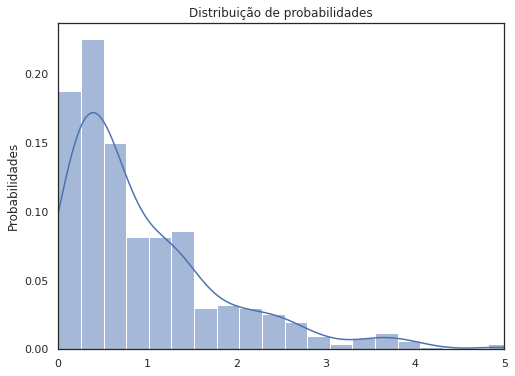

In [107]:
sns.set_style('white')

plt.figure(figsize=(8,6))
plt.xlim(0, 5)

fig = sns.histplot(data = Y, 
             stat='probability', 
             kde=True)

fig.set_title('Distribuição de probabilidades')
fig.set(ylabel='Probabilidades')

# Parte 2

Usar simulação de amostras pseudoaleatórias para provar o Teorema do Limite Central

##2.1

Primeiro, criamos uma variável aleatória com distribuição de Poisson de lambda = 5. 

Essa variável tem o formato (500, n), onde 500 é o número de amostras aleatórias e n é a quantidade de observações por amostra.

*Modificar o tamanho de n para ver as mudanças no gráfico

In [22]:
X = np.random.poisson(5, size=(500, 50))

##2.2

Criamos um loop para tirar a média de cada linha e armazenar em uma variável sample_mean, correspondente à média amostral.

In [108]:
sample_mean = list()
for row in X:
  sample_mean.append(np.mean(row))

In [109]:
print(sample_mean[:10])

#As 10 primeiras linhas, ou 10 primeiras médias amostrais

[4.46, 4.76, 5.02, 5.06, 4.86, 5.1, 5.2, 5.0, 5.08, 4.8]


##2.3 e 2.4

Agora, podemos fazer a visualização do histograma de distribuição de probabilidades para a média amostral.

Text(0.5, 1.0, 'Distribuição de probabilidades')

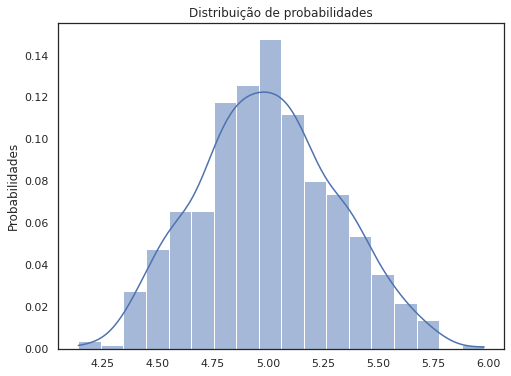

In [110]:
sns.set_style('white')

plt.figure(figsize=(8,6))

fig = sns.histplot(data = sample_mean, 
             stat='probability', 
             kde=True)

fig.set(ylabel='Probabilidades')
fig.set_title('Distribuição de probabilidades')

Analisando o histograma, podemos verificar que os valores tendem a estar mais concentrados nas proximidades do centro, ou da mediana.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


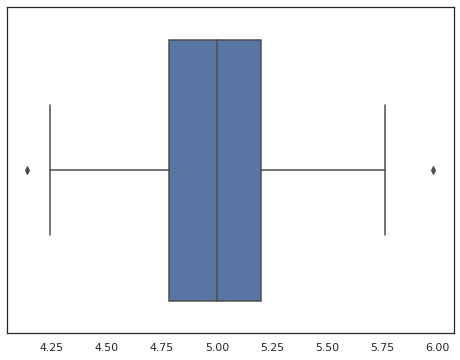

In [25]:
sns.set_style('white')
plt.figure(figsize=(8, 6))

fig = sns.boxplot(sample_mean)

Analisando o boxplot, verificamos que há pontos abaixo do limite inferior e acima do limite superior. Esses pontos podem ser considerados outliers.

## 2.5.a

Analisando graficamente, verificamos que o histograma tem certa simetria e um formato de sino.

## 2.5.b

Vamos verificar se as medidas de tendência central (média, mediana e moda) são próximas.

In [26]:
print('Média: ', st.mean(sample_mean))
print('Mediana: ', st.median(sample_mean))
print('Moda', st.mode(sample_mean))

Média:  4.99736
Mediana:  5.0
Moda 4.9


São valores próximos, a maior diferença é entre a mediana e a moda, de 0.1.

##2.5.c

Agora, checamos se a amplitude ultrapassa 6 vezes o valor do desvio padrão.

A amplitude amostral é a diferença entre o maior valor e o menor valor observados na amostra.

In [111]:
amplitude = sample_mean[-1] - sample_mean[0]

#subtrai o último valor da amostra pelo primeiro

print('Amplitude = ', amplitude)
print('6 vezes o desvio padrão: ', 6 * np.std(sample_mean))

Amplitude =  0.8399999999999999
6 vezes o desvio padrão:  1.8805748840181824


Assim, constatamos que a amplitude NÃO ultrapassa esse valor.

##2.5.d



Análise dos outliers

Uma forma de encontrar e contar outliers é através de uma análise numérica do gráfico boxplot. Nele, temos as seguintes propriedades:

1.   Quartis: cada um possui 25% da amostra. Consideramos Q1, Q2 e Q3; Q2 corresponde à mediana.
2.   Intervalo ou amplitude interquartil (I): a região coberta pela "caixa". Corresponde a Q3 - Q1.
3.   Limite superior: Q3 + (1.5 * I)
4.   Limite inferior: Q1 - (1.5 * I)
5.   Qualquer valor acima do limite superior ou abaixo do limite inferior é considerado outlier.

Para fazer essa análise, primeiramente precisamos ordenar os valores da amostra. Então, podemos calcular os valores dos quartis, o valor de I e os limites superior e inferior.

In [65]:
sample_mean.sort()

#Ordena os valores da amostra

In [66]:
q1, q3 = np.percentile(sample_mean, [25, 75])
I = q3 - q1

In [68]:
limite_superior = q3 + (1.5 * I)
limite_inferior = q1 - (1.5 * I)

In [70]:
print('O limite superior da amostra é: ', limite_superior)
print('O limite inferior da amostra é: ', limite_inferior)

O limite superior da amostra é:  5.83
O limite inferior da amostra é:  4.15


Agora, podemos detectar e contar os outliers. Vamos dividir em duas partes: primeiro, os que estão abaixo do limite inferior.

In [112]:
lower_outliers = 0

for x in ordered:
  if x < limite_inferior:
    lower_outliers += 1

print('Número de outliers inferiores: ', lower_outliers)

Número de outliers inferiores:  1


Agora, os que estão acima do limite superior.

In [113]:
upper_outliers = 0

for x in ordered:
  if x > limite_superior:
    upper_outliers += 1

print('Número de outliers superiores: ', upper_outliers)

Número de outliers superiores:  1


Agora que temos a quantidade de outliers, podemos calcular sua proporção.

O total de outliers é a soma dos outliers superiores com os inferiores. Fazemos a razão entre esse número e o tamanho da amostra.

In [116]:
total_outliers = lower_outliers + upper_outliers

print('A porcentagem de outliers na amostra é de {}%'.format(100 * total_outliers/len(sample_mean)))

A porcentagem de outliers na amostra é de 0.4%


##2.5.e

Agora, queremos saber a porcentagem da área sob a curva em relação ao desvio amostral.

Encontrando a área de x +/- s:

In [98]:
def porcentagem_area(X, desvio_padrao):
  area = list()
  for x in X:
    if (x >= np.mean(X) - desvio_padrao) and (x <= np.mean(X) + desvio_padrao):
      area.append(x)
  return ((len(area)/len(X)) * 100)

In [99]:
print('Para s, a área corresponde a aproximadamente {:.2f}% da curva'.format(porcentagem_area(sample_mean, np.std(sample_mean))))

Para s, a área corresponde a aproximadamente 65.60% da curva


In [100]:
print('Para 2s, a área corresponde a aproximadamente {:.2f}% da curva'.format(porcentagem_area(sample_mean, np.std(sample_mean) * 2)))

Para 2s, a área corresponde a aproximadamente 96.80% da curva


In [101]:
print('Para 3s, a área corresponde a aproximadamente {:.2f}% da curva'.format(porcentagem_area(sample_mean, np.std(sample_mean) * 3)))

Para 3s, a área corresponde a aproximadamente 99.80% da curva


##2.5.f

Por último, queremos verificar se, no gráfico de distribuição de probabilidade, os pontos têm alguma relação linear.

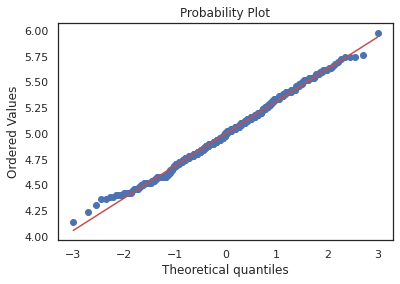

In [104]:
stats.probplot(sample_mean, plot = plt)
plt.show()

Através do gráfico, constatamos que, de forma geral, os pontos têm uma forte relação linear.